In [46]:
import os
from pathlib import Path

import geopandas as gpd
import shapely

In [55]:
data_path = Path(os.environ["DATA_PATH"])
results_path = Path("./results")

In [14]:
df = gpd.read_file(data_path / "datos" / "drenajes.gpkg").drop_duplicates(
    subset=["geometry"],
)

In [17]:
merged = df["geometry"].line_merge()

In [29]:
points = df[["geometry"]].explode().boundary.to_frame()
points.sjoin(points)

,0,index_right
0,"MULTIPOINT ((359571.936 3509445.463), (359484....",43851
0,"MULTIPOINT ((359571.936 3509445.463), (359484....",33675
0,"MULTIPOINT ((359571.936 3509445.463), (359484....",0
0,"MULTIPOINT ((359571.936 3509445.463), (359484....",50634
1,"MULTIPOINT ((359786.201 3509043.726), (359860....",18367
...,...,...
62132,"MULTIPOINT ((368747.136 3506220.671), (368798....",33486
62133,"MULTIPOINT ((368205.796 3504657.274), (368171....",59323
62133,"MULTIPOINT ((368205.796 3504657.274), (368171....",62133
62133,"MULTIPOINT ((368205.796 3504657.274), (368171....",47563


In [57]:
union = df[["geometry"]].explode().union_all()
merged = list(shapely.line_merge(union).geoms)

out = gpd.GeoDataFrame(geometry=merged, crs=df.crs)
out.to_crs("EPSG:4326").to_file(results_path / "platform" / "drenajes.geojson")

<Axes: >

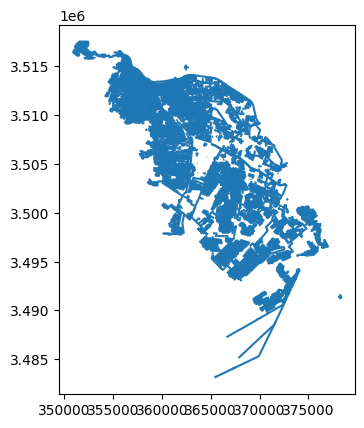

In [54]:
out.plot()